In [0]:
from keras.utils import np_utils 
from keras.datasets import mnist 
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd
import seaborn as sns

import keras
from keras.models import Sequential 
from keras.layers import Dense, Activation,Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

In [0]:
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

img_rows = 28
img_cols = 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train/255
x_test = x_test/255

y_train = np_utils.to_categorical(y_train, 10) 
y_test = np_utils.to_categorical(y_test, 10)

In [0]:
batch_size = 128
num_classes = 10
epochs = 12

3 Convolutional Layers

In [0]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),padding='same',activation='relu',input_shape=input_shape))
model.add(Conv2D(64,kernel_size = (5,5),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Conv2D(32, kernel_size=(3, 3),padding='same',activation='relu'))
model.add(Conv2D(64,kernel_size = (5,5),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),padding='same'))

model.add(Conv2D(32, kernel_size=(3, 3),padding='same',activation='relu'))
model.add(Conv2D(64,kernel_size = (5,5), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(4,4),padding='same'))

model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 28, 28, 64)        51264     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 14, 14, 32)        18464     
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 5, 5, 32)          18464     
__________

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 672s 11ms/step - loss: 0.6168 - acc: 0.8232 - val_loss: 0.0631 - val_acc: 0.9816
Epoch 2/12
60000/60000 [==============================] - 663s 11ms/step - loss: 0.0885 - acc: 0.9766 - val_loss: 0.0367 - val_acc: 0.9897
Epoch 3/12
60000/60000 [==============================] - 662s 11ms/step - loss: 0.0605 - acc: 0.9844 - val_loss: 0.0385 - val_acc: 0.9898
Epoch 4/12
60000/60000 [==============================] - 659s 11ms/step - loss: 0.0491 - acc: 0.9868 - val_loss: 0.0263 - val_acc: 0.9932
Epoch 5/12
60000/60000 [==============================] - 659s 11ms/step - loss: 0.0422 - acc: 0.9891 - val_loss: 0.0232 - val_acc: 0.9937
Epoch 6/12
60000/60000 [==============================] - 657s 11ms/step - loss: 0.0363 - acc: 0.9907 - val_loss: 0.0272 - val_acc: 0.9924
Epoch 7/12
60000/60000 [==============================] - 647s 11ms/step - loss: 0.0309 - acc: 0.9916 - val_loss: 0.

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03619625380380894
Test accuracy: 0.9908


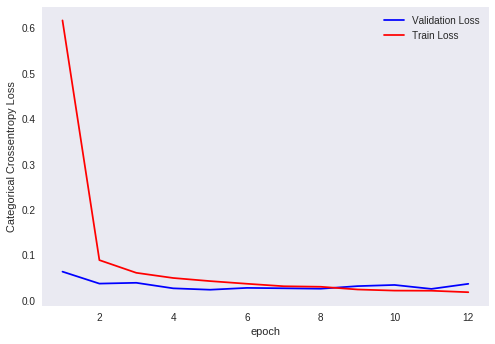

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

5 Convolution Layers

In [0]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),padding='same',activation='relu',input_shape=input_shape))
model.add(Conv2D(64,kernel_size = (5,5),padding = 'same',activation = 'relu'))
model.add(MaxPooling2D(pool_size=(3,3),padding='same'))

model.add(Conv2D(32, kernel_size=(4,4),padding='same',activation='relu'))
model.add(Conv2D(64,kernel_size = (5,5),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),padding='same'))

model.add(Conv2D(32, kernel_size=(5,5),padding='same',activation='relu'))
model.add(Conv2D(64,kernel_size = (6,6),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),padding='same'))

model.add(Conv2D(32, kernel_size=(4,4),padding='same',activation='relu'))
model.add(Conv2D(64,kernel_size = (6,6),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),padding='same'))

model.add(Conv2D(32, kernel_size=(5,5),padding='same',activation='relu'))
model.add(Conv2D(64,kernel_size = (6,6),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),padding='same'))

model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_113 (Conv2D)          (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_114 (Conv2D)          (None, 28, 28, 64)        51264     
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_115 (Conv2D)          (None, 10, 10, 32)        32800     
_________________________________________________________________
conv2d_116 (Conv2D)          (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_117 (Conv2D)          (None, 4, 4, 32)          51232     
__________

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 604s 10ms/step - loss: 1.4790 - acc: 0.3850 - val_loss: 1.0822 - val_acc: 0.5015
Epoch 2/12
60000/60000 [==============================] - 602s 10ms/step - loss: 0.5329 - acc: 0.8220 - val_loss: 0.3030 - val_acc: 0.9029
Epoch 3/12
60000/60000 [==============================] - 602s 10ms/step - loss: 0.2093 - acc: 0.9533 - val_loss: 0.1224 - val_acc: 0.9765
Epoch 4/12
60000/60000 [==============================] - 604s 10ms/step - loss: 0.1478 - acc: 0.9695 - val_loss: 0.0933 - val_acc: 0.9807
Epoch 5/12
60000/60000 [==============================] - 602s 10ms/step - loss: 0.1011 - acc: 0.9798 - val_loss: 0.0652 - val_acc: 0.9860
Epoch 6/12
60000/60000 [==============================] - 602s 10ms/step - loss: 0.0941 - acc: 0.9813 - val_loss: 0.0956 - val_acc: 0.9787
Epoch 7/12
60000/60000 [==============================] - 601s 10ms/step - loss: 0.0918 - acc: 0.9822 - val_loss: 0.

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.044668429520819335
Test accuracy: 0.9887


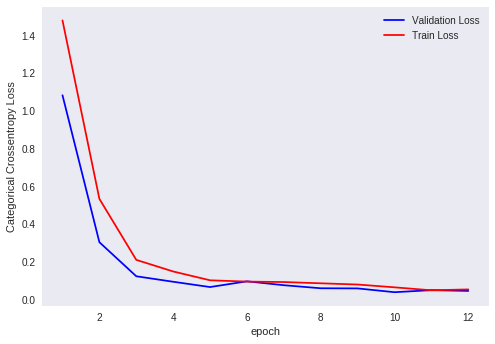

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

7 Convolutional Layers

In [0]:
model = Sequential()

model.add(Conv2D(32,kernel_size = (3,3),padding = 'same',activation = 'relu',input_shape = input_shape))
model.add(Conv2D(64,kernel_size = (5,5),padding = 'same',activation = 'relu'))
model.add(MaxPooling2D(pool_size=(3,3),padding='same'))

model.add(BatchNormalization())

model.add(Conv2D(32, kernel_size=(4,4),padding='same',activation='relu'))
model.add(Conv2D(64,kernel_size = (5,5),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(4,4),padding='same'))

model.add(BatchNormalization())

model.add(Conv2D(32, kernel_size=(5,5),padding='same',activation='relu'))
model.add(Conv2D(64,kernel_size = (6,6),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(5,5),padding='same'))

model.add(BatchNormalization())

model.add(Conv2D(32, kernel_size=(4,4),padding='same',activation='relu'))
model.add(Conv2D(64,kernel_size = (6,6),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(6,6),padding='same'))

model.add(BatchNormalization())

model.add(Conv2D(32, kernel_size=(5,5),padding='same',activation='relu'))
model.add(Conv2D(64,kernel_size = (6,6),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),padding='same'))

model.add(BatchNormalization())

model.add(Conv2D(32, kernel_size=(5,5),padding='same',activation='relu'))
model.add(Conv2D(64,kernel_size = (5,5),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(4,4),padding='same'))

model.add(BatchNormalization())

model.add(Conv2D(32, kernel_size=(4,4),padding='same',activation='relu'))
model.add(Conv2D(64,kernel_size = (7,7),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(5,5),padding='same'))

model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 10, 64)        256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 32)        32800     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
__________

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test)) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 603s 10ms/step - loss: 0.9687 - acc: 0.6452 - val_loss: 0.5443 - val_acc: 0.8350
Epoch 2/12
60000/60000 [==============================] - 607s 10ms/step - loss: 0.2516 - acc: 0.9378 - val_loss: 0.1349 - val_acc: 0.9707
Epoch 3/12
60000/60000 [==============================] - 621s 10ms/step - loss: 0.1385 - acc: 0.9714 - val_loss: 0.1593 - val_acc: 0.9672
Epoch 4/12
60000/60000 [==============================] - 627s 10ms/step - loss: 0.1065 - acc: 0.9781 - val_loss: 0.0760 - val_acc: 0.9816
Epoch 5/12
60000/60000 [==============================] - 580s 10ms/step - loss: 0.0860 - acc: 0.9825 - val_loss: 0.0876 - val_acc: 0.9794
Epoch 6/12
60000/60000 [==============================] - 577s 10ms/step - loss: 0.0791 - acc: 0.9843 - val_loss: 0.1046 - val_acc: 0.9739
Epoch 7/12
60000/60000 [==============================] - 578s 10ms/step - loss: 0.0708 - acc: 0.9856 - val_loss: 0.

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.05102709092050791
Test accuracy: 0.9905


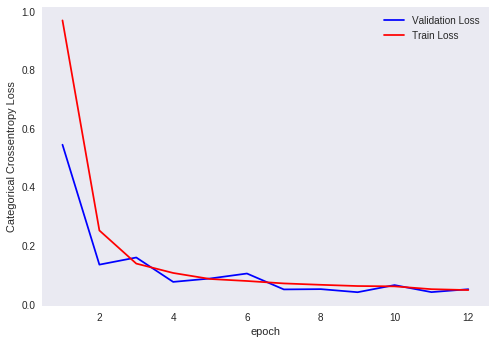

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)